<a href="https://colab.research.google.com/github/putfuiard/bike/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama:Putfui Ari Dewi
- Email :putfuiari18@gmail.com
- Id Dicoding:putfuiard

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 :  Bagaimana perbedaan jumlah sewa sepeda jika tergantung pada kondisi cuaca?
- pertanyaan 2 : Bagaimana perubahan jumlah sewa sepeda pada 12 bulan?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()
hour_df=pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
day_df.duplicated().sum()
hour_df.duplicated().sum()

0

In [ ]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi day: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour: ", hour_df.duplicated().sum())

Jumlah duplikasi day:  0
Jumlah duplikasi hour:  0


In [ ]:
#Menghapus kolom instant dan windspeed
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
# Mengganti nama kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mapping numerical values to categorical labels
# musim
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
#bulan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
#tahun
day_df['year'] = day_df['year'].map({
    0: '2022',
    1: '2023'
})
#libur
day_df['holiday'] = day_df['holiday'].map({
    0: 'Sat', 1: 'sun'
})
#hari kerja
day_df['workingday'] = day_df['workingday'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat'
})
#hari biasa
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
#cuaca
day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Converting selected columns to categorical type
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

for col in categorical_columns:
    day_df[col] = day_df[col].astype('category')

# Normalizing numerical features (temp, atemp, hum, windspeed) using MinMaxScaler
scaler = MinMaxScaler()
day_df[['temp', 'atemp', 'hum']] = scaler.fit_transform(day_df[['temp', 'atemp', 'hum']])

# One-hot encoding categorical variables for the 'season' column
day_df = pd.get_dummies(day_df, columns=['season'])

day_df.head()


,instant,date,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,2022,Jan,Sat,Sat,Mon,Misty/Cloudy,0.355170,0.373517,0.828620,0.160446,331,654,985
1,2,2011-01-02,2022,Jan,Sat,Sun,Mon,Misty/Cloudy,0.379232,0.360541,0.715771,0.248539,131,670,801
2,3,2011-01-03,2022,Jan,Sat,Mon,Tue,Clear/Partly Cloudy,0.171000,0.144830,0.449638,0.248309,120,1229,1349
3,4,2011-01-04,2022,Jan,Sat,Tue,Tue,Clear/Partly Cloudy,0.175530,0.174649,0.607131,0.160296,108,1454,1562
4,5,2011-01-05,2022,Jan,Sat,Wed,Tue,Clear/Partly Cloudy,0.209120,0.197158,0.449313,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

1. Berdasarkan Cuaca

In [ ]:
day_df.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather                                             
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

 Data menunjukkan bahwa kondisi cuaca yang paling umum adalah "Clear/Partly Cloudy", diikuti oleh "Misty/Cloudy" dan "Light Snow/Rain". Nilai rata-rata untuk setiap kondisi cuaca berbeda-beda, dengan  "Clear/Partly Cloudy" memiliki nilai rata-rata tertinggi dan "Light Snow/Rain"memiliki nilai rata-rata terendah.

In [ ]:
2. Berdasarkan Bulan

In [ ]:
day_df = day_df.groupby(by='month').agg({
  'count': ['max', 'min', 'mean', 'sum']
})

if isinstance(day_df['count'], pd.MultiIndex):
  day_df['count_max'] = day_df['count'].get_level_values('max')
else:
  day_df['count_max'] = day_df['count'].max()

day_df.sort_values(by='count_max', ascending=False)


count                            count_max
        max   min         mean     sum          
month                                           
Apr    7460   795  4484.900000  269094       NaN
Aug    7865  1115  5664.419355  351194       NaN
Dec    6606   441  3403.806452  211036       NaN
Feb    5062  1005  2655.298246  151352       NaN
Jan    4521   431  2176.338710  134933       NaN
Jul    8173  3285  5563.677419  344948       NaN
Jun    8120  3767  5772.366667  346342       NaN
Mar    8362   605  3692.258065  228920       NaN
May    8294  2633  5349.774194  331686       NaN
Nov    6852  1495  4247.183333  254831       NaN
Oct    8156    22  5199.225806  322352       NaN
Sep    8714  1842  5766.516667  345991       NaN

 Menunjukkan bahwa rata-rata jumlah penyewaan sepeda bervariasi dari bulan ke bulan. Jumlah rata-rata tertinggi terjadi pada bulan Juni (8120), diikuti pada bulan Juli (8173).


3. Berdasarkan Tahun

In [ ]:
day_df.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
       max  min         mean      sum
year                                 
2022  6043  431  3405.761644  1243103
2023  8714   22  5599.934426  2049576

Terjadi peningkatan dari tahun 2022 ke 2023

4. Berdasarkan hari libur

In [ ]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
Sat      8714    22  4527.104225  3214244
sun      7403  1000  3735.000000    78435

aktivitas pada hari libur Sabtu jauh lebih banyak dibandingkan pada hari libur Minggu

5. Hari Biasa

In [ ]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

6. Hari Kerja

In [ ]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
Mon         8714  605  4330.168831  1000269
Tue         8362   22  4584.820000  2292410

Pada hari kerja lebih banyak hari Selasa dibandingkan Senin

## Visualization & Explanatory Analysis

### Pertanyaan 1:

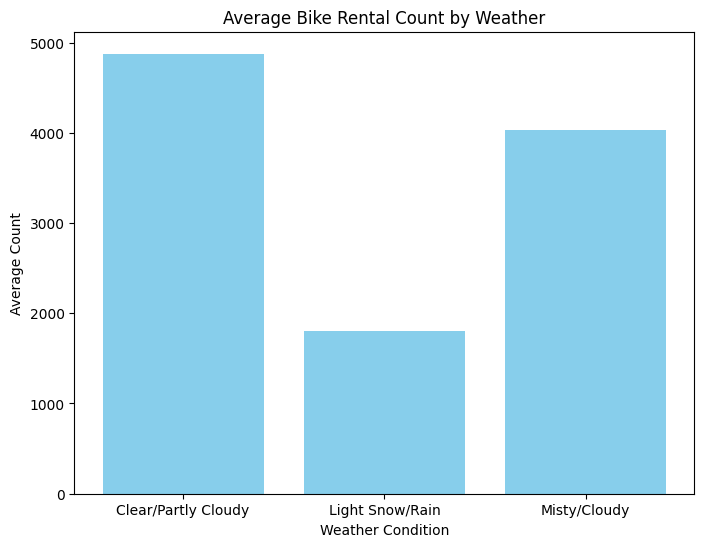

In [ ]:
weather_count_mean = day_df.groupby('weather')['count'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(weather_count_mean['weather'], weather_count_mean['count'], color='skyblue')
plt.title('Average Bike Rental Count by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Count')
plt.show()


Berdasarkan data yang diberikan, jumlah sewa sepeda rata-rata paling tinggi pada saat cuaca cerah atau berawan (Clear/Partly Cloudy). Jumlah sewa sepeda rata-rata paling rendah pada saat cuaca hujan (Light Snow/Rain).


### Pertanyaan 2:

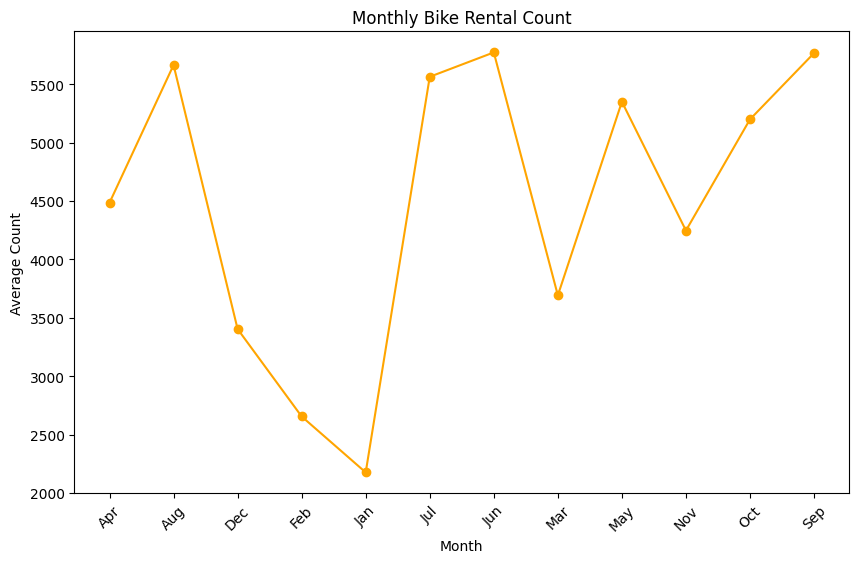

In [ ]:
month_count_mean = day_df.groupby('month')['count'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(month_count_mean['month'], month_count_mean['count'], marker='o', color='orange')
plt.title('Monthly Bike Rental Count')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.show()


Menunjukkan bahwa rata-rata jumlah penyewaan sepeda bervariasi dari bulan ke bulan. Jumlah rata-rata tertinggi terjadi pada bulan Juni, diikuti pada bulan Juli. Jumlah rata-rata terendah terjadi pada bulan Februari.



## Conclusion

- Conclution pertanyaan 1 :  Berdasarkan visualisasi tersebut, dapat disimpulkan bahwa jumlah sewa sepeda cenderung lebih tinggi pada saat cuaca cerah atau berawan. Hal ini mungkin disebabkan oleh kondisi cuaca yang nyaman dan mendukung untuk bersepeda.

- conclution pertanyaan 2: Berdasarkan visualisasi tersebut, dapat disimpulkan bahwa jumlah sewa sepeda bulanan cenderung lebih tinggi pada bulan Juni dan Juli. Hal ini mungkin disebabkan oleh faktor-faktor seperti cuaca, liburan, dan hari libur nasional.